# Part I - (Propser Loan Data dataset )
## by (Lerato Maluleke)

## Introduction
> Introduction

This analysis explores information from the Prosper Loan dataset. The provided csv file contains data for 113,937 loans with 81 variable on each loan, including loan amount, borrower rate(or interest rate), current loan status, if they default or pay on time etc.

According to their website: “Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States.

## Preliminary Wrangling


<h2>Table of content</h2>
<ol>
    <li><a href="#load">Load data</a></li>
    <li><a href="#breakdown">Break down of the dataframe</a>
        <ol>
            <li><a href="#describe">Describe dataframe</a></li>
        </ol>
    </li>
    <li><a href="#structure">What is the structure of your dataset?</a></li>
    <li><a href="feature">What is/are the main feature(s) of interest in your dataset?</a></li>
    <li><a href="#features">What features in the dataset do you think will help support your investigation into your feature(s) of interest?</a></li>
    <li><a href="#univariate">Univariate Exploration</a>
        <ol>
            <li><a href="#credit">How does the credit score affect the loans outcome?</a></li>
            <li><a href="#loan-term">How does the loan term affect the loans outcome?</a></li>
            <li><a href="#employment">Is employment one of the important factor?</a></li>
            <li><a href="#prosper">Prosper rating</a></li>
            <li><a href="#original-amount">Loan original amount</a></li>
        </ol>
    </li>
    <li><a href="#affects">What effects the borrowers APR or interest rate in prosper loan?</a>
        <ol>
            <li><a href="#apr">Borrower's APR or interest rate</a></li>
            <li><a href="#dir">Debt to income ratio</a></li>
        </ol>
      </li>
    <li><a href="#distribution">Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?</a>
        <ol>
            <li><a href="#unusual-distribution">Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?</a></li>
        </ol>
    </li>
        <li><a href="#bivariate">Bivariate Exploration</a>
            <ol>
                <li><a href="#relationship">Is there any relationship between Emploment status, PropserRating and term?</a></li>
                <li><a href="#correlation">How is the correlation between these variables? </a></li>
                <li><a href="#variables">Employment vs other variables</a></li>
                <li><a href="#heatmap">Heatmap</a></li>
            </ol>
        </li>
    <li><a href="#relationships">Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?</a>
    <ol>
                <li><a href="#interactions">Were there any interesting or surprising interactions between features?</a></li>
        </ol>
        </li>
        <li><a href="#multivariate">Multivariate Exploration</a>
            <ol>
                <li><a href="#rating">Does the rating have and effect between loam amount and APR?</a></li>
            </ol>
        </li>
    <li><a href="#defaulted">Do defaulted and charged off loans have a higher APR?</a></li>
    <li><a href="#strengthened">Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?</a>
        <ol>
            <li><a href="#interesting">Were there any interesting or surprising interactions between features?</a></li>
        </ol>
</ol>

In [316]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import csv
import seaborn as sns

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Base color for graphs 

base_color = sb.color_palette()[0]

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.
<div id="load" />

In [317]:
# Load data. 

ploan = pd.read_csv('prosperLoanData.csv')

<div id="breakdown" />

In [318]:
# A breakdown of the dataframe.

print(ploan.shape)
print(ploan.head(5))
print(ploan.info())
print(ploan.dtypes)

(113937, 81)
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18

In [319]:
# Checking for any duplicates. There are no duplicates. 
ploan.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113932    False
113933    False
113934    False
113935    False
113936    False
Length: 113937, dtype: bool

In [320]:
# .head is dispalying  the first 5 rows.
ploan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [321]:
# Here is a concise summary of this dataframe.
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

#### Not all of the columns will be used therefore we will create a subset of columns of interest. 


In [322]:
cols = ['LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'StatedMonthlyIncome', 'CreditGrade','LoanOriginalAmount',
    'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)','ProsperPaymentsOneMonthPlusLate']
loan_subset = ploan[cols]

<div id="describe" />

In [323]:
# descriptive statistics for numeric variables
loan_subset.describe()

,BorrowerAPR,StatedMonthlyIncome,LoanOriginalAmount,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperPaymentsOneMonthPlusLate
count,113912.000000,1.139370e+05,113937.00000,105383.000000,113937.00000,113937.000000,22085.000000
mean,0.218828,5.608026e+03,8337.01385,0.275947,8337.01385,40.830248,0.048540
std,0.080364,7.478497e+03,6245.80058,0.551759,6245.80058,10.436212,0.556285
min,0.006530,0.000000e+00,1000.00000,0.000000,1000.00000,12.000000,0.000000
25%,0.156290,3.200333e+03,4000.00000,0.140000,4000.00000,36.000000,0.000000
50%,0.209760,4.666667e+03,6500.00000,0.220000,6500.00000,36.000000,0.000000
75%,0.283810,6.825000e+03,12000.00000,0.320000,12000.00000,36.000000,0.000000
max,0.512290,1.750003e+06,35000.00000,10.010000,35000.00000,60.000000,21.000000


<div id="structure" />
What is the structure of your dataset?

> The propser data has 113937 entries and 81 data columns with these data types boolean 3,50 float,11 inter and 17 objects. The data has a memory usage of 64.1+ mb. Dataframe has columns which have the monthly loan payment,Loan number, BorrowerAPR etc.

 #   Column                
<div id="feature" />
What is/are the main feature(s) of interest in your dataset?

> What factors affect a loan's outcome status?
> What effects the borrowers APR or interest rate?

<div id="features" />
What features in the dataset do you think will help support your investigation into your feature(s) of interest?


The dataset that can support my investigation include these factors CreditGrade,EmploymentStatus,BorrowerAPR,DebtToIncomeRatio BorrowerAPR,Term,ProsperRating,ProsperPaymentsOneMonthPlusLate.            

<div id="univariate" />

## Univariate Exploration


<div id="credit" />

### 1. How does the credit score affect the loans outcome? 

Text(0.5, 1.0, 'Credit grade distribution')

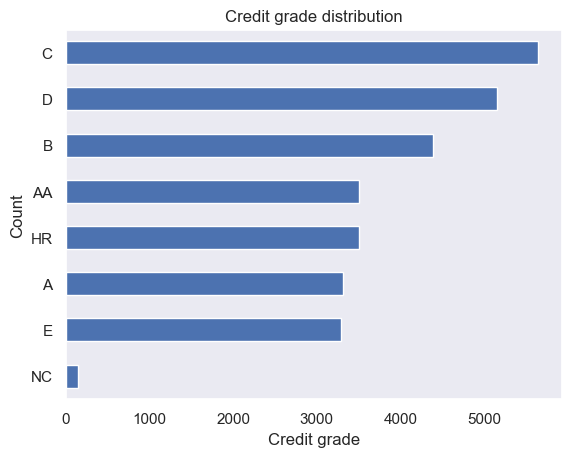

In [324]:
base_color = sb.color_palette()[0]
sb.set()

status_ordered = loan_subset.CreditGrade.value_counts().sort_values(ascending = True)
status_ordered
status_ordered.plot(kind = 'barh', grid = False)
plt.ylabel('Count')
plt.xlabel('Credit grade')
plt.title('Credit grade distribution')

Customers who have a credit grade of C, D and B have a higher chance of getting a loan whereas NC has a lower chance of getting a loan.A higher creditscore  indicate a lower risk of default and, therefore, a higher likelihood of loan approval.

<div id="loan-term" />

### 2.How does the loan term affect the loans outcome? 

<AxesSubplot:xlabel='Term', ylabel='count'>

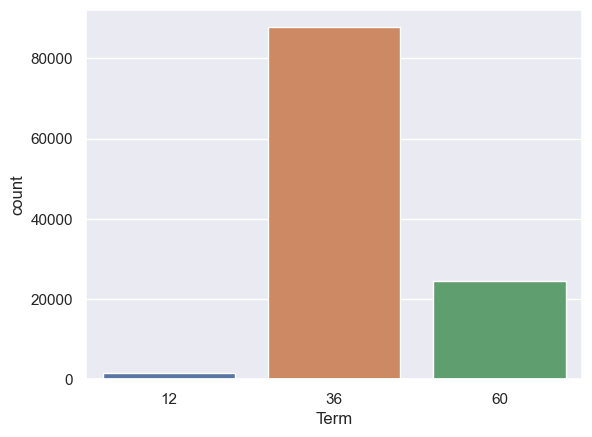

In [325]:
sb.set()
sb.countplot(data=loan_subset, x='Term')

Loan Term: The length of time a borrower has to repay a loan affects the outcome of the loan. Longer loan terms may provide more flexibility for the borrower, but may also increase their risk of defaulting.This will be compared to another factor in bivariate so we can come to a conclusion on how it affects repayment etc 

<div id="employment" />

### 3.Is employment one of the important factor?

In [326]:
# set dtype of 'EmploymentStatus' to category
loanstatus_order = loan_subset['EmploymentStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories =loanstatus_order)
                                        

loan_subset['EmploymentStatus'] = loan_subset['EmploymentStatus'].astype(ordered_var)
loan_subset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   LoanStatus                       113937 non-null  object  
 1   BorrowerAPR                      113912 non-null  float64 
 2   EmploymentStatus                 111682 non-null  category
 3   StatedMonthlyIncome              113937 non-null  float64 
 4   CreditGrade                      28953 non-null   object  
 5   LoanOriginalAmount               113937 non-null  int64   
 6   IncomeVerifiable                 113937 non-null  bool    
 7   DebtToIncomeRatio                105383 non-null  float64 
 8   LoanOriginalAmount               113937 non-null  int64   
 9   Term                             113937 non-null  int64   
 10  ProsperRating (Alpha)            84853 non-null   object  
 11  ProsperPaymentsOneMonthPlusLate  22085 non-null   fl

### Who is likely has a chance to get a loan? 

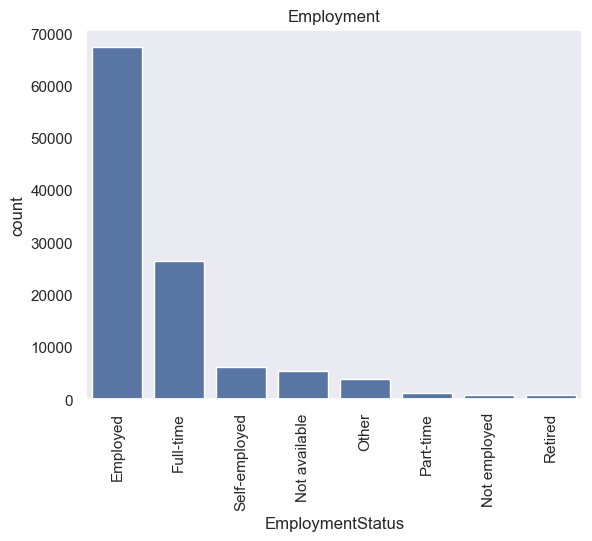

In [327]:
base_color = sb.color_palette()[0]
sb.countplot(data = loan_subset, x = 'EmploymentStatus', color= base_color)   
plt.xticks(rotation=90)
plt.title('Employment')
plt.grid(False);
 

From the bar graph people who are employed are in high numbers compared to a person who is not employed, retired or works part-time and the rest of the employment status.Status which is showing full-time and self employes is showing a higher rating meaning employment does play a major role when it comes to a loan status being approved 

### 4. In which rating are poeple likely to get a loan?  

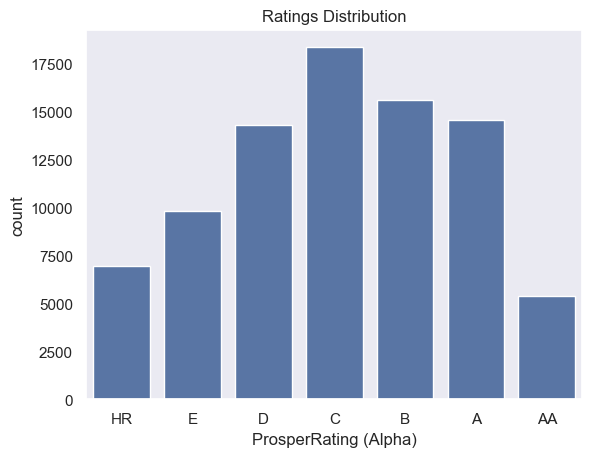

In [328]:
# categorical setting the graph
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_var = pd.api.types.CategoricalDtype(categories = rating_order, ordered = True)
loan_subset['ProsperRating (Alpha)'] = loan_subset['ProsperRating (Alpha)'].astype(ordered_var)

base_color = sb.color_palette()[0]
sb.countplot(data = loan_subset, x = 'ProsperRating (Alpha)', color = base_color)
plt.title('Ratings Distribution')
plt.grid(False);

<div id="propser" />
Prosper Score: The Prosper Score is a proprietary scoring system that assesses the risk of a loan.

It seems like most borrowers are A,D,B and C. 

<div id="original-amount" />

### 5.Loan original amount

In [329]:
loan_subset['LoanOriginalAmount'].describe()

,LoanOriginalAmount,LoanOriginalAmount
count,113937.00000,113937.00000
mean,8337.01385,8337.01385
std,6245.80058,6245.80058
min,1000.00000,1000.00000
25%,4000.00000,4000.00000
50%,6500.00000,6500.00000
75%,12000.00000,12000.00000
max,35000.00000,35000.00000


In [330]:
# Check loans with APR greater than 0.43
loan_subset[loan_subset.BorrowerAPR>0.43]

,LoanStatus,BorrowerAPR,EmploymentStatus,StatedMonthlyIncome,CreditGrade,LoanOriginalAmount,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha),ProsperPaymentsOneMonthPlusLate
18326,Defaulted,0.45857,NaN,10000.000000,HR,3000,True,0.10252,3000,36,NaN,NaN
22195,Chargedoff,0.46201,NaN,2916.666667,HR,1789,True,0.35430,1789,36,NaN,NaN
36018,Completed,0.51229,NaN,2838.000000,HR,1500,True,0.02852,1500,36,NaN,NaN
56761,Defaulted,0.50633,NaN,0.000000,HR,3000,False,0.03909,3000,36,NaN,NaN
82043,Defaulted,0.48873,NaN,1583.333333,HR,3000,True,0.10021,3000,36,NaN,NaN
103973,Defaulted,0.45857,NaN,3750.000000,HR,2800,True,0.19413,2800,36,NaN,NaN


<div id="affects" />
### What effects the borrowers APR or interest rate in prosper loan ? 

The borrower's APR or interest rate in a Prosper loan is determined by a number of factors, including their credit score, debt-to-income ratio, loan term. Additionally, Prosper takes into account the borrower's past payment history, the amount of available funds in the borrower's account, and the borrower's listing category.Here we will be looking at more variables from adding from the ones already mentioned from above. These variables answer our question here. 

<div id="apr" />

### 1. Borrower's APR or interest rate 

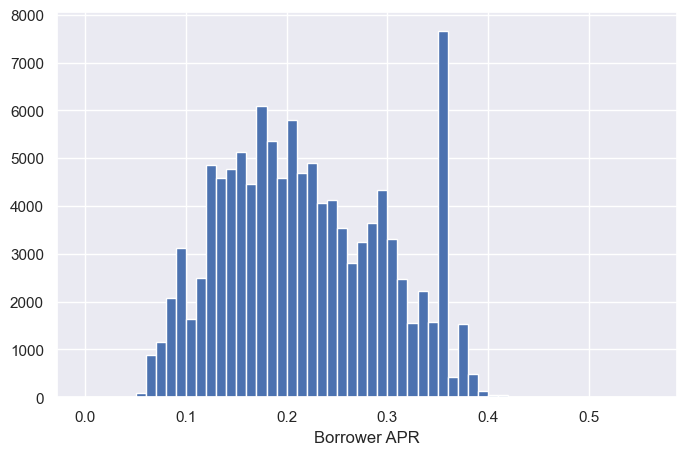

In [331]:
bins = np.arange(0, ploan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = ploan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

In [332]:
# Look at loans with APR greater than 0.42
loan_subset[loan_subset.BorrowerAPR > 0.42]

,LoanStatus,BorrowerAPR,EmploymentStatus,StatedMonthlyIncome,CreditGrade,LoanOriginalAmount,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha),ProsperPaymentsOneMonthPlusLate
18326,Defaulted,0.45857,NaN,10000.000000,HR,3000,True,0.10252,3000,36,NaN,NaN
22195,Chargedoff,0.46201,NaN,2916.666667,HR,1789,True,0.35430,1789,36,NaN,NaN
36018,Completed,0.51229,NaN,2838.000000,HR,1500,True,0.02852,1500,36,NaN,NaN
56761,Defaulted,0.50633,NaN,0.000000,HR,3000,False,0.03909,3000,36,NaN,NaN
82043,Defaulted,0.48873,NaN,1583.333333,HR,3000,True,0.10021,3000,36,NaN,NaN
103973,Defaulted,0.45857,NaN,3750.000000,HR,2800,True,0.19413,2800,36,NaN,NaN
105889,Chargedoff,0.42395,Employed,2250.000000,NaN,1000,True,0.08000,1000,36,HR,NaN


The distribution seems like its multomodal with a small peaks of o.1 and a bigger one at 0.2. Then it declines the has a peak of 0.3 then a sudden spike at 0.35. Then a decrease of loans above 0.42

<div id="dir" />
2. Debt to income ratio

In [333]:
loan_subset.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

 ### How is the distribution?

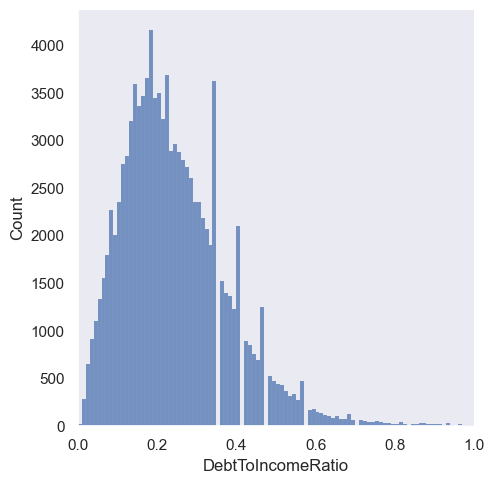

In [334]:
# first lets examine the distribution where DebtToIncomeRatio <= 1
bin_edges = np.arange(0, loan_subset.DebtToIncomeRatio.max() + 0.01, 0.01)
sb.displot(loan_subset.DebtToIncomeRatio, kde = False, bins = bin_edges)
plt.xlim((0, 1))
plt.grid(False);

The distribution of stated monthly income is severely right screwed, with most of stated monthly income less than 30k.

In [335]:
# Looking at debt to income ratio > 1
loan_subset[loan_subset['DebtToIncomeRatio'] > 1]

,LoanStatus,BorrowerAPR,EmploymentStatus,StatedMonthlyIncome,CreditGrade,LoanOriginalAmount,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha),ProsperPaymentsOneMonthPlusLate
22,Current,0.35356,Other,118.333333,NaN,4000,True,9.20,4000,36,HR,NaN
226,Completed,0.11749,Full-time,0.083333,D,1000,False,10.01,1000,36,NaN,NaN
368,Completed,0.20735,Full-time,1083.333333,C,16000,True,1.65,16000,36,NaN,NaN
419,Defaulted,0.35356,Other,1061.000000,NaN,4000,True,1.26,4000,36,HR,0.0
576,Completed,0.10505,Retired,0.083333,AA,1500,False,10.01,1500,36,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
113387,Completed,0.39153,Employed,4000.000000,NaN,1500,True,2.38,1500,36,HR,NaN
113407,Completed,0.25163,Full-time,233.333333,C,1386,True,2.16,1386,36,NaN,NaN
113486,Current,0.35643,Employed,441.666667,NaN,2500,True,1.05,2500,36,HR,NaN
113626,Completed,0.17722,NaN,0.083333,A,25000,False,10.01,25000,36,NaN,NaN


- The rows showing for debt to income ratio which is > 1 is 799 rows.
- The plot is right skewed however it has 799 entries which are > 1.
- From the graph it shows that there is a decrease 0.35 furthuremore drops from 0.6.


 <div id="distribution" />
 
### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  I started by analysing factors which affect the outcome of a loan. Then looked at what effects the borrowers APR or interest rate in prosper loan.
> The variable called Borrower APR display a downward peak of 0.3 and then a sudden spike of 0.35.There are bearly any loans above 0.42 unless we incluse outliers(APR> 4.2).There are no unsual points. 
> Transformatoin was made so by converting a some columns into 'category' datatype. 

 <div id="unusual-distribution" />
 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

_Credit Score_: Customers who have a credit grade of C, D and B have a higher chance of getting a loan whereas NC has a lower chance of getting a loan.A higher creditscore  indicate a lower risk of default and, therefore, a higher likelihood of loan approval. There was a transformation done in this graph, I made it to be ordered so it will be easy to analyse data. 

_Loan Term_:Most of the terms which are 36 months show 77%, followed by 60 months at 21.5% and lastly 12 months at 1.5%. 

_Employment Status_: Most people who were approved of loans are considered 'employed', followed by 'Full-Time'. The ones who were approved are working in some form or another since those are 'not employed' or retired make up a small portion of the overall loans. We should also be aware of the missing information, marked as 'not available'.

_Prosper Rating_: Most borrowers are between D-A

Debt-To-Income Ratio: The distribution is right-skewed when it is less than or equal 1. However, there are about 799 more entries where it is larger than 1; it still wouldn't change that fact that the distribution will be right-skewed, even if we add these data to the graph. Furthermore, we can see that there are some drastic drops in counts as the ratio approaches 0.4. The drops happened at around 0.36, 0.41, 0.46 and 0.57. There are some smallers drops after 0.6. 

 <div id="bivariate" />
 
## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my data. Futhuremore the variables that I will cover here have been introduced in some fashion in the previous section (univariate exploration).

In [336]:
num_var = ['ProsperPaymentsOneMonthPlusLate', 'BorrowerAPR', 'DebtToIncomeRatio']
cat_var = ['LoanStatus', 'IncomeVerifiable', 'EmploymentStatus', 'Term', 'ProsperRating (Alpha)']

# num_vars = ['ProsperPaymentsOneMonthPlusLate', 'CreditGrade', 'LoanStatus']
# cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']

 <div id="relationship" />
 
### Is there any relationship between Emploment status, PropserRating and term?

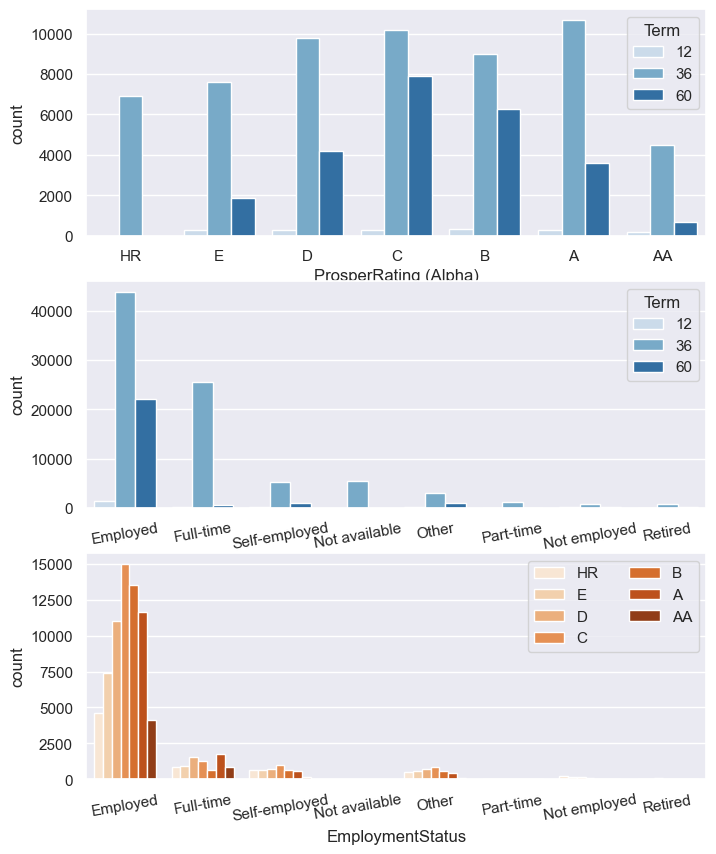

In [337]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = loan_subset, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_subset, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_subset, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Oranges')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

Employment status variable do not have enough data on part-time, not employed and retired to show how it relates with term and Prosper rating variables. However there we can still see an relationship with other variables such as employed, full-time,self-employed,part-time and other. There is an interaction between term and Prosper rating. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

 <div id="correlation" />
 
### How is the correlation between these variables?

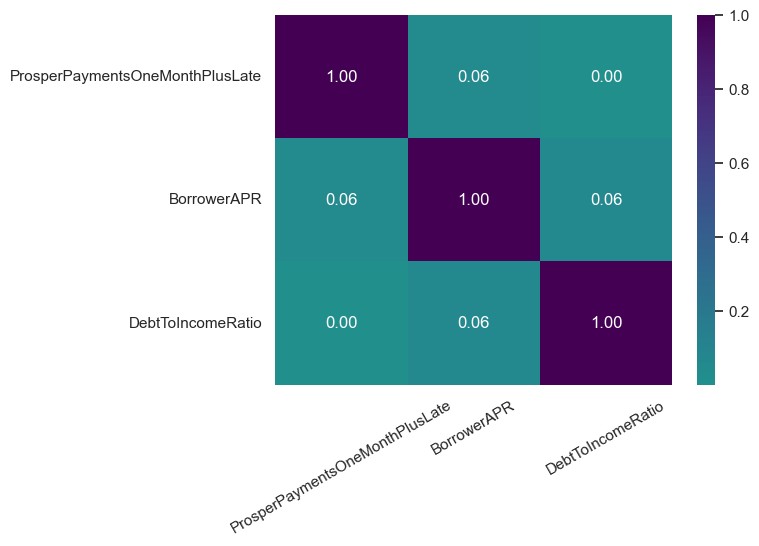

In [338]:

sb.heatmap(loan_subset[num_var].corr(), annot = True, fmt = '0.2f',
          cmap = 'viridis_r', center = 0)
plt.xticks(rotation = 30);

In this heatmap shows a  positive correlation between prosper payment one month missed and Borrower APR have a positive of 0.06 the same with Borrower APR AND Debt income ratio is 0.06.Futhuremore Debt-to-income is even 0.00 with each variable there is no effect of one to another.

 <div id="variables" />
 
### Employment vs other variables 

####  Does a Term affecct the chance of getting a loan when one is employed?

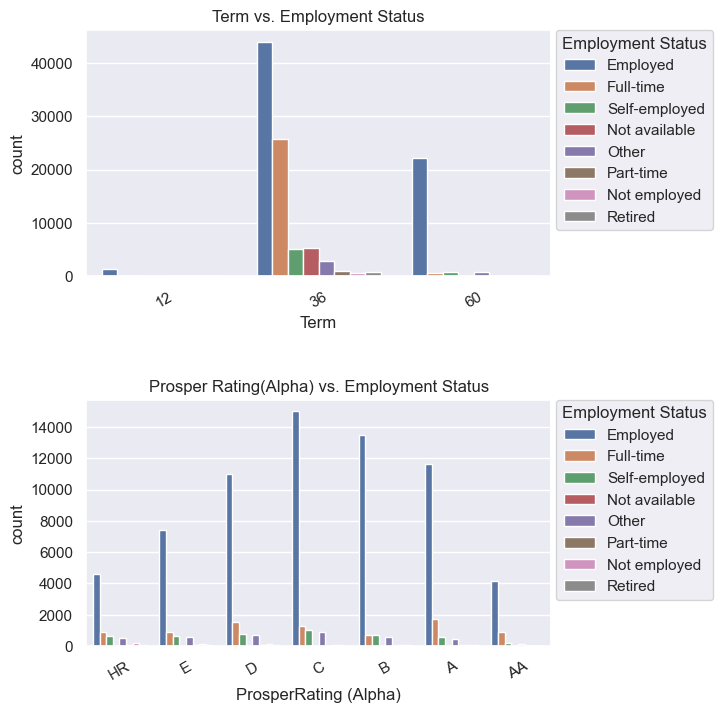

In [339]:
plt.figure(figsize = [6, 8])

#subplot 1
plt.subplot(2,1,1)
sb.countplot(data = loan_subset, x = 'Term', hue = 'EmploymentStatus')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0, title = "Employment Status")
plt.xticks(rotation = 30)
plt.title('Term vs. Employment Status');

#subplot 2
plt.subplot(2,1,2)
sb.countplot(data = loan_subset, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0, title = "Employment Status")
plt.xticks(rotation = 30)
plt.title('Prosper Rating(Alpha) vs. Employment Status');

plt.subplots_adjust(hspace=.5)

In the first graph employed customers status is showing in all the terms, showing the highest.In term for 36 months employed customers are the highest followed by full-time employment.The 60 months employment is still showing the highest this could mean when one is employed there is a greater chance of getting a loan dispite the term of the loan. 

The next graph also shows employment in across all the prosper rating, especially C,B,A and D.

 <div id="heatmap" />
 
### Heatmap

In [340]:
num_var = ['BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio']
cat_var = ['LoanStatus', 'IncomeVerifiable', 'EmploymentStatus', 'Term', 'ProsperRating (Alpha)',]

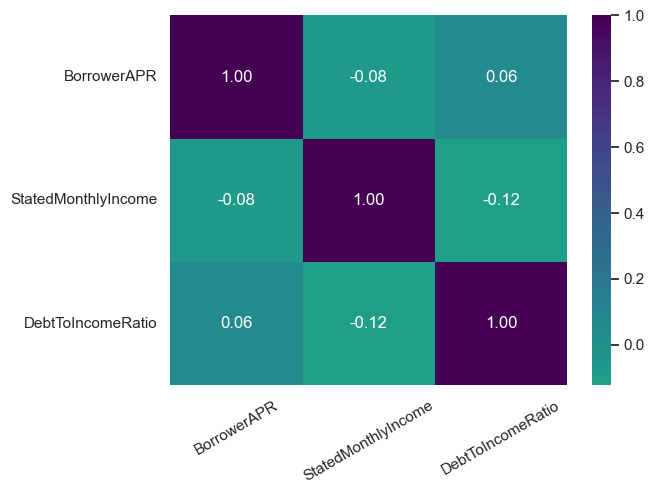

In [341]:
# correlation plot
# sb.heatmap(loan_subset[num_var].corr(), annot = True, fmt = '0.2f',
#           cmap = 'viridis_r', center = 0)
# plt.xticks(rotation = 30);

sb.heatmap(loan_subset[num_var].corr(), annot = True, fmt = '0.2f',
          cmap = 'viridis_r', center = 0)
plt.xticks(rotation = 30);

 <div id="relationships" />
Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>The borrower APR is negatively associated with the stated monthly income, which mean the more the income, the lower the APR. It also shows that at different size of the income amount, the APR has a large range, but the range of APR decrease with the increase of the monthly income. 

>The objective of this work is to investigate factors affecting borrower rate and loan amount:


I found also that there are some negative and strong relationships between the categorical/ordinal variables selected and the interest rate. As an example, Unemployed people have more restrictive credit condition (higher rate) than the people who have jobs. The second factor determinant is that borrowers with higher monthly salaries tend to get a lower lending interest rate. So it's a good determinant as well.

Similarly, there is a strong indication that the Prosper score and rating is an excellent determinant factor of borrower's rate. We can conclude that the higher the score , the lower the rate. In other words, borrowers with AA prosper ratings could expect an APR that will likely fall into the 2-15% range, whereas borrowers with bad ratings (HR) could expect their interest rate to go as high as 40%!


 <div id="interactions" />
 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>There is a interaction between prosper rating and term. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers. The difference between the employment status  was not far apart when compared to the prosper rating however when compared to other variables the is a huge difference espacially the emplyment status. 


 <div id="multivariate" />
 
### Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

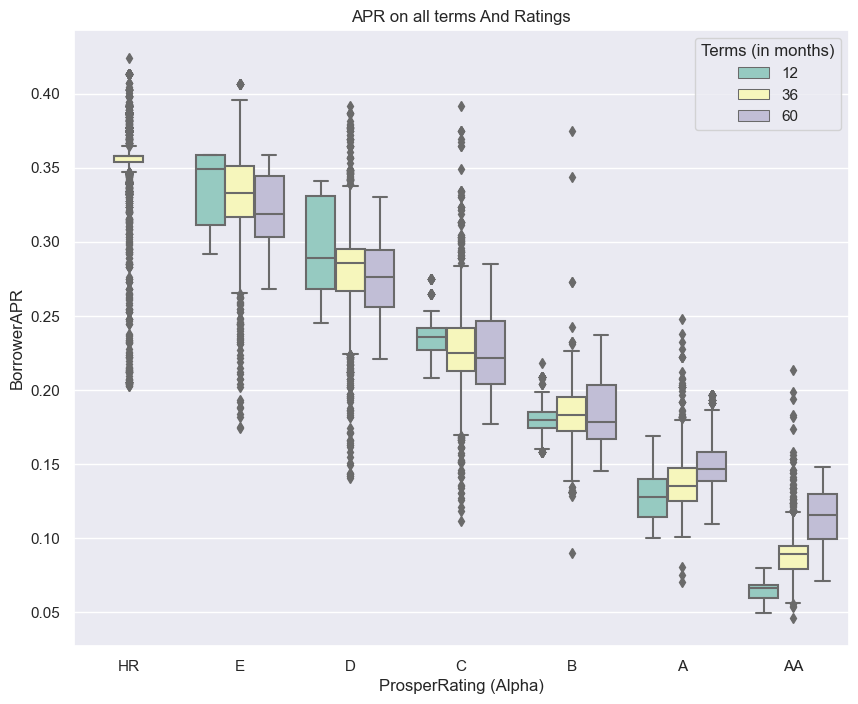

In [361]:
fig = plt.figure(figsize = [10, 8])
ax = sb.boxplot(x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term',
                 data=loan_subset, palette="Set3")
plt.title('APR on all terms And Ratings')
plt.legend(title = 'Terms (in months)');

Each individual term over every rating, the APR decreases as the rating increases. Typically the APR decreases when the term is longer. Though the rating HR may not show due to insufficient data, the ratings E-C follow this. When it gets to rating B and higher, the longer ther term, the higher the APR for each individual level. It is interesting to note the sheer amount of outliers for 12-month terms across all ratings. It seems that this type of loan is more personalized or customermized for the individual borrower.

 <div id="rating" />
Does the rating have and effect between lamount and APR?

In [366]:
num_var = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'DebtToIncomeRatio']
cat_var = ['LoanStatus', 'IncomeVerifiable', 'EmploymentStatus', 'Term', 'ProsperRating (Alpha)']

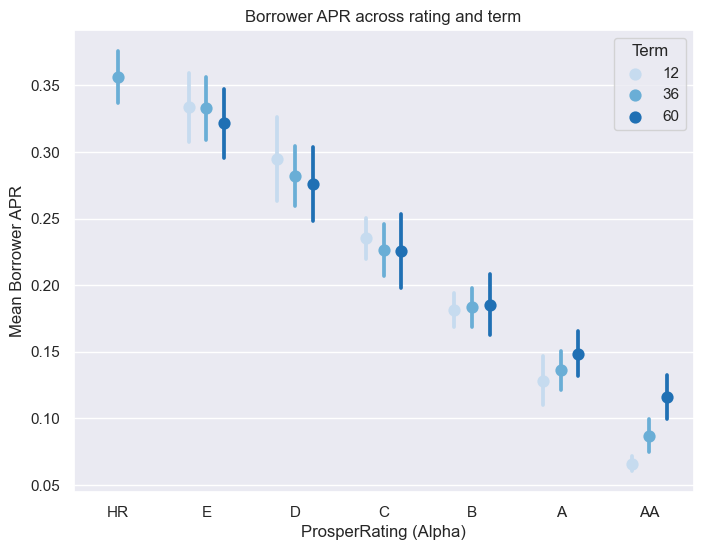

In [367]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_subset, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

When the rating increases the relationship gets stringer and turn positive. The individual rating has some effect on the relationship between the original loan amount and APR. 

#### Do defaulted and charged off loans have a higher APR? 

 <div id="defaulted" />
Looking 

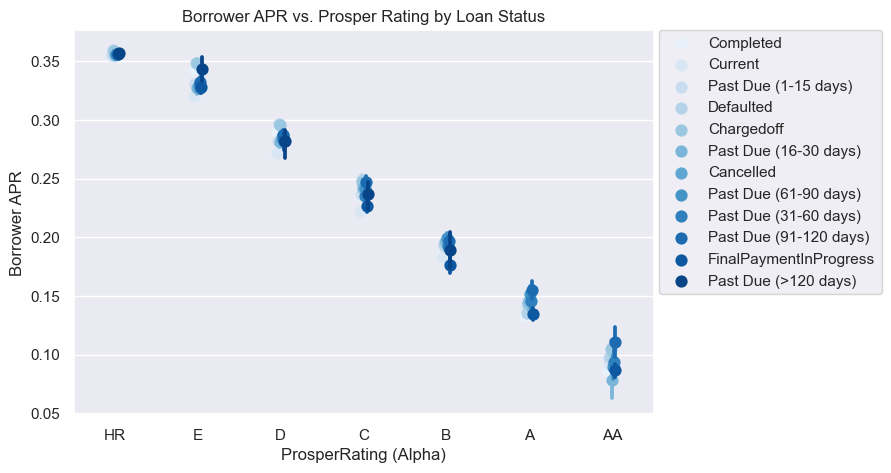

In [364]:
fig = plt.figure(figsize=[8, 5])
ax = sb.pointplot(data=loan_subset, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='LoanStatus',
                  palette='Blues', linestyles='', dodge=0.1)
plt.title('Borrower APR vs. Prosper Rating by Loan Status')
plt.ylabel('Borrower APR')

# Move the legend to the right side of the plot
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

# Adjust the plot's right margin to make room for the legend
plt.subplots_adjust(right=0.85)

plt.show()


.Those with a lower rating have the most pastdue like HR-D.This shows one the reasons why one might has a poor credit score to begin with.Yes, the loan status and rating have an effect on one another plus the APR increase.For all Prosper Ratings except for "A",and "AA", Defaulted and charged off loans usually have a higher Borrower APR compared to completed or current loans(good records). 

 <div id="strengthened" />
 
### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>I extended my investigation of loan and interest rate against the most explanatory determinants in this section.


>There is a difference between the rates applied according to the maturities. In other words, the rates applied on 5-year loans are generally higher than the rates applied on other maturities, regardless of the prosper rating (with the exception of the E rating (same rates for 3 and 5 years loans ) and the HR rating). This is obvious, when the duration is longer it increases the risk of this operation involving a rise in rates. Of course, as it is always mentioned, the rates are the lowest, for individuals with a good rating. Interestingly, for HR rating, only 3 years loans are observed in this dataset.

>All Prosper Ratings except for "A",and "AA", Defaulted and charged off loans usually have a higher Borrower APR compared to completed or current loans(good records).



 <div id="interesting" />
 
### Were there any interesting or surprising interactions between features?

> A suprising  thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term. furthuremore an interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA


In [365]:
# Converting this report to html format
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_template.ipynb'])

4294967295